# Practice toy project in the third day of 100 days code challenge

## Context:

We want to know what are the charges for our health policy in US.

We know in this dataframe the police attributes for each holder: how old they are, if they smoke, if they don't smoke, if they have children, in which region of the US they live, among others. Therefore, we would like to know how much the charges would be in our case. We could ask an expert actuary who has experience in these questions... or we can build a Machine Learning model, which with the same attributes of the data set between various holders in the US, can make a prediction about the appropriate charges for us.

In [ ]:
# The question we want to answer with our ML model: What is the best charge our insurance police can have?

# Task: Construct a basic linear regression model.

## Action

In [38]:
# Import the principal libraries for data analysis:

import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import numpy as np # Intended to manipulate matrices or multidimensional arrays also.
import seaborn as sns # Python data visualization library based on matplotlib.
import plotly.express as px # It contains functions that can create entire figures at once.
from matplotlib.cbook import boxplot_stats # Return a list of dictionaries of statistics used to draw a series of box.
import matplotlib.pyplot as plt # It provides an implicit, MATLAB-like, way of plotting.

# For the math modeling and the estimators:
# sklearn has simple and efficient tools for predictive data analysis.

from sklearn.linear_model import LinearRegression # To import the class we want to train in this notebook.
from sklearn.model_selection import train_test_split # To split data into training data and test data subsets.
from sklearn import metrics # To have all the metrics to be used as cost functions to be minimized.
import statsmodels.api as sm # It provides classes and functions for the estimation of many different statistical models.

# Maybe?:
import warnings # To disappear the wanings (if necessary) later.
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
# GridSearchCV searchs over specified parameter values for an estimator.
# cross_val_score evaluates a score by cross-validation.
# cross_val_predict: The data is split according to the cv parameter. Each sample belongs to exactly one test set.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Ratio of the variance of estimating some parameter in a model that includes multiple other terms.

In [2]:
# Read the dataset:

data_frame_day3 = pd.read_csv('insurance.csv')

Although in the previous 2 days we have done a bit of EDA (exploratory data analysis), as it is an extremely important step in any data analysis process, we are going to repeat some of the steps here.

In [3]:
# To see the first and last 5 rows:

print(data_frame_day3)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
# Let's understand the structure of the data:

data_frame_day3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Pandas don't indicate any missing value until this point.

We have:

* **Categorical data** : qualitative data, expressed mostly in the form of *strings* .

* **Numeric data**.

In [6]:
# Let's group the variables into numerical and categorical variables.

numeric_features = data_frame_day3[["age","bmi","children","charges"]]

categorical_features = data_frame_day3[["sex","smoker","region"]]

In [7]:
numeric_features.head() 

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [8]:
categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
# Descriptive statistics excluding null values:

data_frame_day3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Let's round the numbers to two decimal places (... just 'cuz cuter, nothing in particular now).

data_frame_day3.describe().apply(lambda x: round(x, 2)) # Apply() function calls the lambda function and applies it.

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


We can see that we have 1 ID+6 features (characteristics of each policy holder); and 1 target, which are the charges.

<AxesSubplot: xlabel='charges', ylabel='Count'>

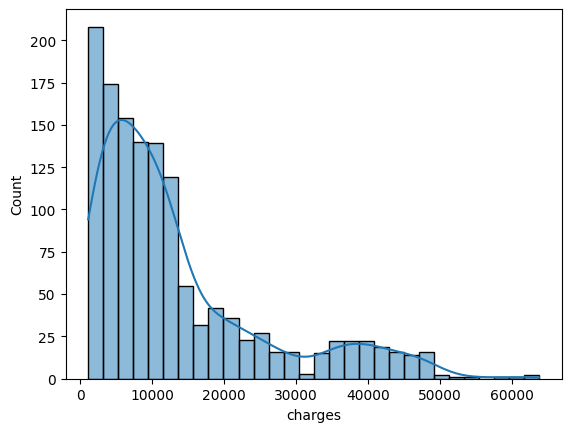

In [11]:
# Let's study then the charges distribution:

sns.histplot(data_frame_day3["charges"], kde=True) # kde = Kernel Density Estimation. KDE produces a smooth estimate.

In [ ]:
# Charges distribution is deviates to left.

# Let's do a bit more of EDA on charges:

In [24]:
# Function for make an statistic summary:

def summarize(feature):
    minimum = data_frame_day3[feature].min()
    maximum = data_frame_day3[feature].max()
    quantile25 = data_frame_day3[feature].quantile(0.25) # From pandas: return value at the given quantile.
    quantile50 = data_frame_day3[feature].quantile(0.50)
    quantile75 = data_frame_day3[feature].quantile(0.75)
    IQR = quantile75 - quantile25 # Interquantile range
    mean = data_frame_day3[feature].mean()
    standard_deviation = data_frame_day3[feature].std()
    sns.boxplot(x = data_frame_day3[feature])
    print(f"Minimum Value: {minimum}\nMaimumx Value: {maximum}\nQuantile 25%: {quantile25}\nQuantile 50%: {quantile50}\nQuantile 75%: {quantile75}\nInterquantile range: {IQR}\nMean: {mean}\nStandard deviation: {standard_deviation}")

Minimum Value: 1121.8739
Maimumx Value: 63770.42801
Quantile 25%: 4740.28715
Quantile 50%: 9382.033
Quantile 75%: 16639.912515
Interquantile range: 11899.625365
Mean: 13270.422265141257
Standard deviation: 12110.011236694001


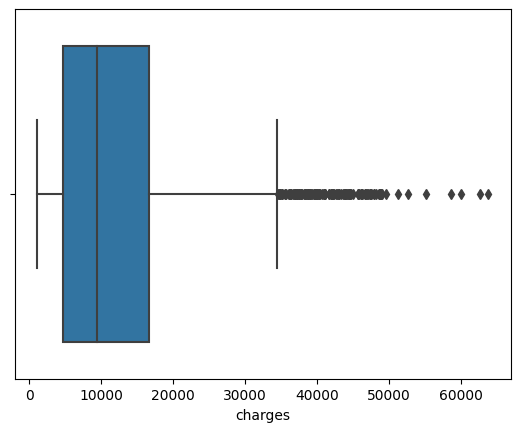

In [25]:
summarize('charges')

In [29]:
# Let's study now the correlation among the variables:

correlations = data_frame_day3.corr() # Compute correlation of columns, excluding null values.

C:\Users\dafda\AppData\Local\Temp\ipykernel_1536\3718939176.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_frame_day3.corr() # Compute correlation of columns, excluding null values.


In [30]:
correlations["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

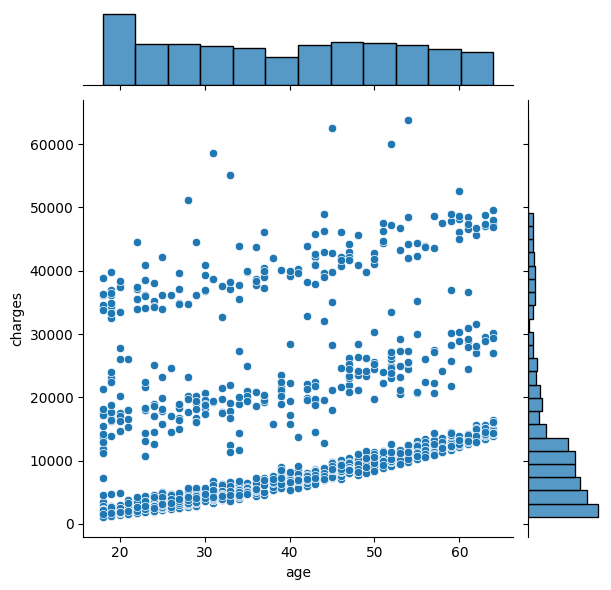

In [31]:
# In the case of numeric variables, the age is the most correlated one.

# Let's explore now a bit this correlation:

sns.jointplot(data=data_frame_day3, x="age", y="charges")

<AxesSubplot: xlabel='age', ylabel='charges'>

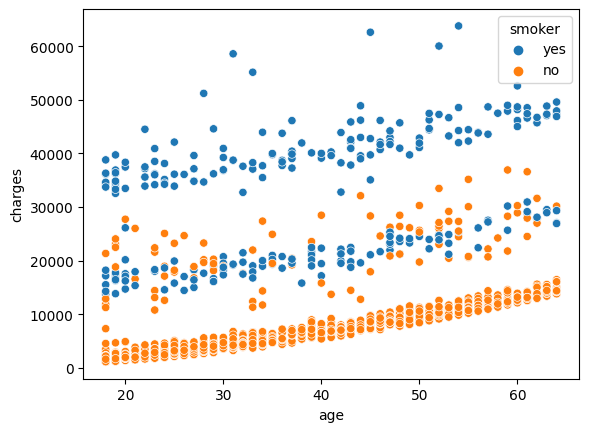

In [33]:
# We see that there's an increase in the charges when there is an increase in the age.
# Now, in day 1 and 2 we studied also that there was a relationship between the charges and the smokers also!

sns.scatterplot(x = data_frame_day3['age'], y = data_frame_day3['charges'], hue = data_frame_day3['smoker'])
# Adding hue = data_frame_day3['smoker'] tells sns we want to colour the data points for smoker and non-smoker differently.

In [34]:
# There are ("at naked eye") many outliers for the charges, let's see the % before decide to eliminate them:

# Finding the outlier values in the charges column:
outlier_list_charges = boxplot_stats(data_frame_day3.charges).pop(0)['fliers'].tolist()
print(outlier_list_charges)

# Finding the number of rows containing outliers:
outlier_charges_rows = data_frame_day3[data_frame_day3.charges.isin(outlier_list_charges)].shape[0]
print("Number of rows contaning outliers in charges : ", outlier_charges_rows)

# Percentage of rows which are outliers:
percent_charges_outlier = (outlier_charges_rows/data_frame_day3.shape[0])*100
print("Percentage of outliers in charges columns : ", percent_charges_outlier)

[39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 44585.45587, 43254.41795, 36307.7983, 38792.6856, 55135.4

In [ ]:
# Well yeah... okay.

With almost 10%, it is reasonable to think about whether or not we should eliminate those outliers. Personally, before deciding to remove them, my first thought is that more study needs to be done before making that decision and we should leave them. However, let's study a little more in detail.

In [41]:
# We know that age and especially smoking influence the charges (according to Day 1 and Day 2). Let us now consider the bmi.

# From Day 1 (other way to see the outliers):

def outliers_info(df, col): # We define the function "outliers_info".
    Q1 = df[col].quantile(0.25) # From pandas: return value at the given quantile.
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 # Interquantile range
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)] 

In [42]:
outliers_charges = outliers_info(numeric_features, 'charges')
print(f"Outlier percentage: {(len(outliers_charges) / len(numeric_features) * 100):.1f}%")
outliers_charges

Outlier percentage: 10.4%


,age,bmi,children,charges
14,27,42.130,0,39611.75770
19,30,35.300,0,36837.46700
23,34,31.920,1,37701.87680
29,31,36.300,2,38711.00000
30,22,35.600,0,35585.57600
...,...,...,...,...
1300,45,30.360,0,62592.87309
1301,62,30.875,3,46718.16325
1303,43,27.800,0,37829.72420
1313,19,34.700,2,36397.57600


Minimum Value: 15.96
Maimumx Value: 53.13
Quantile 25%: 26.29625
Quantile 50%: 30.4
Quantile 75%: 34.69375
Interquantile range: 8.3975
Mean: 30.66339686098655
Standard deviation: 6.098186911679014


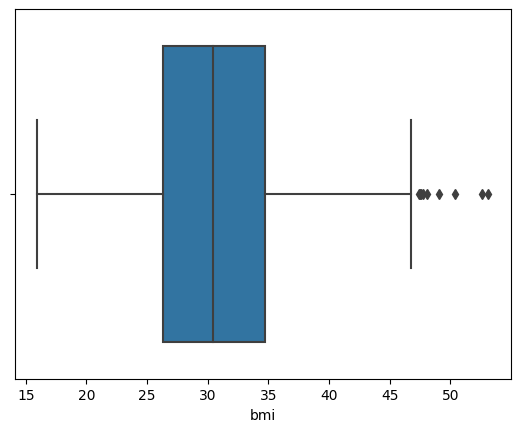

In [48]:
summarize('bmi')

Minimum Value: 18
Maimumx Value: 64
Quantile 25%: 27.0
Quantile 50%: 39.0
Quantile 75%: 51.0
Interquantile range: 24.0
Mean: 39.20702541106129
Standard deviation: 14.049960379216154


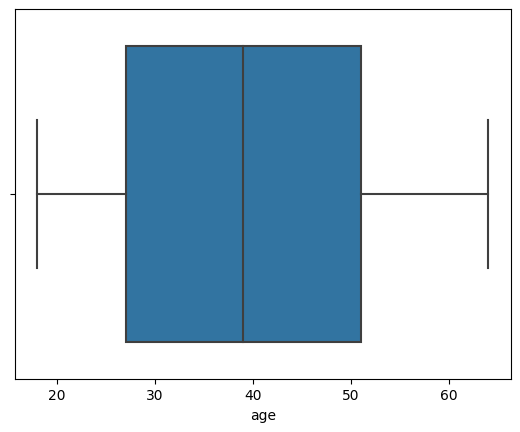

In [49]:
summarize('age')

In [52]:
print(f'Average charges from outliers: ${(outliers_charges.charges.mean()):.0f}')
print(f'Average age from outliers: {outliers_charges.age.mean():.0f}')
print(f'Average bmi from outliers: {outliers_charges.bmi.mean():.0f}')

Average charges from outliers: $42104
Average age from outliers: 41
Average bmi from outliers: 36


In this data outliers, the clients have an age (approx. 41%) and a bmi (approx. 36%) above the average (39% and 30%, respectively). Because almost all clients who become outliers are smokers (according to our analysis in Day 1-2) with age and bmi above the average, it is very reasonable if their insurance charges are large, therefore outliers **will be left**.

In [ ]:
# EXTRA comment: If necessary, we could use the "lower_bound" and "upper_bound" information defined above and thereby remove
# the outliers (we did something similar on day 1). But for now, I think it is not necessary to do so.

# Previous: linear regretion

Despite some outlierss, as we could see in one of the graphs above: it seems that there is a linear relationship between the age variable and the target variable, charges. To model, we are going to use a simple **linear regression model**.

As the name implies, in the linear regression model a straight line is the best way to fit the data.
We are going to relate the charges (Y) with the age attributes (X). In this model:

$y = mx+y_{0}$

A line can be defined by its slope $m$, and its $y$-intercept $y_{0}$ (the $y$ coordinate of its intersection with the $y$-axis).

Our algorithm will precisely find the best values for $m$ and $y_{0}$ that best fit the data. 

## Suggestions:

Tomorrow I'm going to: separate the training and test data. Find the coefficients $m$ and $y_{0}$. Finally, use the trained model to make predictions. Also, I will study the errors of the model (in other words, difference between the predicted values and the actual values of the test data). If possible, it would also be interesting to do a **multiple linear regression** (since the smoker variable is also related at least linearly with the charges).